In [9]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import cv2

# Sum of Squared Difference ; SSD

In [11]:
def ssd_matching(img,templete):
    H,W,_ = img.shape
    Ht,Wt,_ = template.shape

    Smin = 255*H*W*3
    xsim,ysim= -1,-1
    for y in range(H-Ht):
        for x in range(W-Wt):
            S = np.sum(np.abs((img[y:y+Ht,x:x+Wt]-template)))
                
            if S<Smin:
                Smin=S
                xsim,ysim=x,y
    return xsim,ysim,Wt,Ht

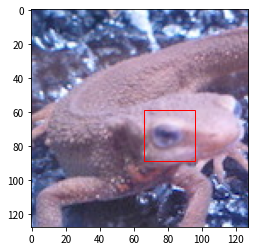

In [12]:
img = cv2.imread("./img/imori.jpg")
template = cv2.imread("./img/imori_part.jpg")


out_x,out_y,out_w,out_h = ssd_matching(img,template)
fig = plt.figure()
ax = plt.axes()
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
# 四角形を描画
r = patches.Rectangle(xy=(out_x, out_y), width=out_h, height=out_w, ec='#FF0000', fill=False)
ax.add_patch(r)
plt.show()

# Sum of Absolute Difference ; SAD

In [13]:
def sad_matching(img,template):
    H,W,_ = img.shape
    Ht,Wt,_ = template.shape

    Smin = 255*H*W*3
    xsim,ysim= -1,-1
    for y in range(H-Ht):
        for x in range(W-Wt):
            S = np.sum(np.abs((img[y:y+Ht,x:x+Wt]-template)))
                
            if S<Smin:
                Smin=S
                xsim,ysim=x,y    

    return xsim,ysim,Wt,Ht

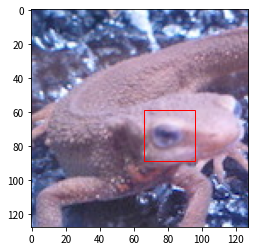

In [14]:
img = cv2.imread("./img/imori.jpg")
template = cv2.imread("./img/imori_part.jpg")


out_x,out_y,out_w,out_h = sad_matching(img,template)
fig = plt.figure()
ax = plt.axes()
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
# 四角形を描画
r = patches.Rectangle(xy=(out_x, out_y), width=out_h, height=out_w, ec='#FF0000', fill=False)
ax.add_patch(r)
plt.show()

# Normalized Cross Correlation ; NCC

In [15]:
def ncc_matching(img, template):
    H, W,_ = img.shape
    Ht, Wt,_ = template.shape

    xsim, ysim = -1, -1
    v = -1

    for y in range(H - Ht):
        for x in range(W - Wt):
            _v = np.sum(img[y : y + Ht, x : x + Wt] * template)
            _v /= (np.sqrt(np.sum(img[y : y + Ht, x : x + Wt] ** 2)) * np.sqrt(np.sum(template ** 2)))

            if _v > v:
                v = _v
                xsim, ysim = x, y

    return xsim,ysim,Wt,Ht

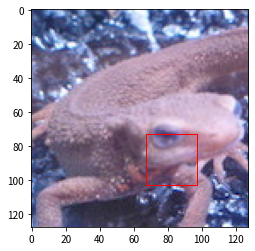

In [16]:
img = cv2.imread("./img/imori.jpg")
template = cv2.imread("./img/imori_part.jpg")


out_x,out_y,out_w,out_h = ncc_matching(img,template)
fig = plt.figure()
ax = plt.axes()
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
# 四角形を描画
r = patches.Rectangle(xy=(out_x, out_y), width=out_h, height=out_w, ec='#FF0000', fill=False)
ax.add_patch(r)
plt.show()

# Zero means Normalized Cross Correlation ; ZNCC

In [17]:
def zncc_matching(img, template):
    H, W, _ = img.shape
    _img = img - np.mean(img, axis=(0, 1))
    Ht, Wt,_ = template.shape
    _template = template - np.mean(img, axis=(0, 1))

    xsim, ysim = -1, -1
    v = -1

    for y in range(H - Ht):
        for x in range(W - Wt):
            _v = np.sum(_img[y : y + Ht, x : x + Wt] * _template)
            _v /= (np.sqrt(np.sum(_img[y : y + Ht, x : x + Wt] ** 2)) * np.sqrt(np.sum(template ** 2)))

            if _v > v:
                v = _v
                xsim, ysim = x, y
    return xsim,ysim,Wt,Ht

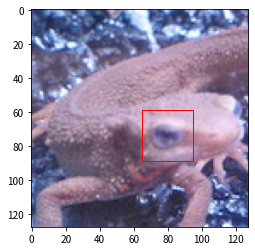

In [18]:
img = cv2.imread("./img/imori.jpg")
template = cv2.imread("./img/imori_part.jpg")


out_x,out_y,out_w,out_h = zncc_matching(img,template)
fig = plt.figure()
ax = plt.axes()
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
# 四角形を描画
r = patches.Rectangle(xy=(out_x, out_y), width=out_h, height=out_w, ec='#FF0000', fill=False)
ax.add_patch(r)
plt.show()